In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras.regularizers import L1, L2
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 26.7MB/s]


In [ ]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 32, input_length=max_sequence_len-1))  # Your Embedding Layer
model.add(LSTM(64, return_sequences=True))  # An LSTM Layer
model.add(Dropout(0.2))  # A dropout layer
model.add(LSTM(32))  # Another LSTM Layer
model.add(Dense(128, activation='relu', kernel_regularizer=L2())) # A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))  # A Dense Layer
# Pick an optimizer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
### END CODE HERE
    
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 32)            102752    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 64)            24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              414219    
Total params: 558,443
Trainable params: 558,443
Non-trainable params: 0
________________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

484/484 [==============================] - 7s 14ms/step - loss: 6.4774 - accuracy: 0.1070
Epoch 98/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4906 - accuracy: 0.1109
Epoch 99/100
484/484 [==============================] - 7s 14ms/step - loss: 6.5058 - accuracy: 0.1123
Epoch 100/100
484/484 [==============================] - 7s 14ms/step - loss: 6.5084 - accuracy: 0.1111


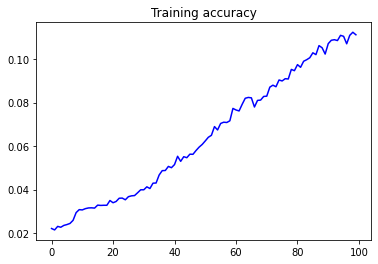

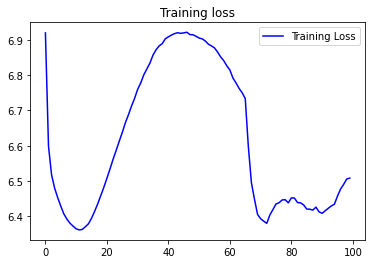

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0))
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of is and and and and and doth and and and and and and and and and and or or or or or one or one one eyes be his eyes be and and and doth and and or or and doth or one or or one eyes be so and so doth doth doth doth and and and doth doth doth doth doth or and so doth your heart be to and and and and and doth and and and and and and and and and and or or or or or one or one one eyes be his
